In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import IPython.display
from scipy.ndimage import gaussian_filter1d
import pysptk
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

# width= 2800 일경우

In [4]:
len(y1)

218432

In [7]:
len(y1)-len(y)

-5568

In [8]:
5568/16000

0.348

In [6]:
first

5327

In [5]:
first1

13009

In [3]:
len(y)

224000

In [9]:
IPython.display.Audio(data=y,rate=16000)

In [10]:
IPython.display.Audio(data=y1,rate=16000)

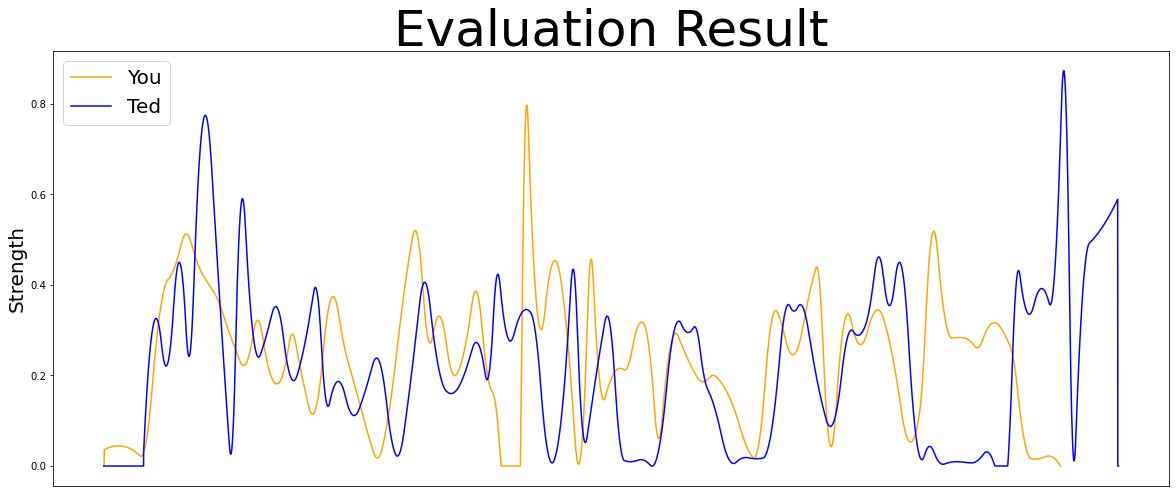

47
0.828125


In [18]:
path='C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav' # 테드동영상위치
y,sr=librosa.load(path,sr=16000) # y는 amplitude
abs_y=abs(y) # amplitude에 절대값취하기
value=[]  # value 는 구간(width) 에서의 최고값이 들어갈자리
loc=[]   # loc 은 value의 x값 위치
c=0
i=0
width=int(len(y)/16000*200)  # width는 그래프에서 중요한부분 뽑을 때 설정하는 구간 넓게 설정하면 정보 많이 날라감
abs_y=list(abs_y) 
while i < len(range(len(y))):
    ten=abs_y[i:i+width]       #ten = 0부터 y길이까지 구간으로 짤른거에서
    a=max(ten)                 #  ten 구간에서 가장큰값이 a로
    b=ten.index(a)             #   b= 그 a값 위치
    value.append(a)            # value리스트에 값저장 
    loc.append(i+b)            # loc에도 위치저장
    if i+width > len(abs_y):   # 구간이 y길이보다 넘어가면 취소
        break
    else:
        c=c+1                  # y길이 안넘어가면 반복
        i=width*c
base=np.empty(len(abs_y))      # base는 빈 array만들어놓고
base.fill(np.nan)
for i in range(len(loc)):       
    location=loc[i]
    base[location]=value[i]     # 빈 어레이에 아까 최대값있었떤 부분 대입 base가 [0,0,0,0,a구간최대값,0,0,0,b구간최대값,] 형태로바뀜
first=np.where(base>st.median(value))[0][0]      #뾰족뾰족 솟은 부분에서 중위수값보다 처음으로 높았던 부분 을 뽑음 
df=pd.DataFrame(base)                               # ( 위에꺼는 두 음악파일의 처음부분 맞쳐주기위해 필요함)
df.interpolate(method='polynomial',order=2,inplace=True) # 이거는 직선 매끄럽게 깍아주려고 2차함수꼴로 바꿔줌
bbb=list(df[0])        
ccc=list(map(lambda x: 0 if x<0 else x,bbb))  # 요거는 2차함수꼴로 깍아주다보면 -값이 발생해서 그걸 0으로바꿔주는과정
df[0]=ccc
st.median(df[0])
df.fillna(0,inplace=True)
#plt.figure(figsize=(20,8))
#plt.plot(df[0],color='blue')

# ###############위에과정반복###########
path2='C:/Users/todtj/OneDrive/바탕 화면/가마우지/TedBear/Anouncement_evaluation/jungeui_voice/12_127_jungeui.wav'# 목소리파일
y1,sr1=librosa.load(path2,sr=16000)
abs_y1=abs(y1)
value1=[]
loc1=[]
c1=0
i=0
abs_y1=list(abs_y1)
while i < len(range(len(y1))):
    ten1=abs_y1[i:i+width]
    a1=max(ten1)
    b1=ten1.index(a1)
    value1.append(a1)
    loc1.append(i+b1)
    if i+width > len(abs_y1):
        break
    else:
        c1=c1+1
        i=width*c1
mult=(st.median(value)/st.median(value1))     ### 이거는 두 그래프의 음량이 다르다보니까 그걸 맞쳐줘야는데 그걸 중위수로 해봤음 
value2=list(map(lambda x: mult*x, value1))    ##            ""
base1=np.empty(len(abs_y1))
base1.fill(np.nan)       
for i in range(len(loc1)):
    location1=loc1[i]
    base1[location1]=value2[i]
first1=np.where(base1>st.median(value1))[0][0]
df1=pd.DataFrame(base1)        
df1.interpolate(method='polynomial',order=2,inplace=True)
bbb=list(df1[0])
ccc=list(map(lambda x: 0 if x<0 else x,bbb))
df1[0]=ccc
df1.fillna(0,inplace=True)

## 이제 다 좌표찍는걸 그리는과정###
if first1>first:                     ## A음성(first1)이 B음성(first)보다 음성이 늦게 시작한다면  그 시작점 맞춰주는과정임
    diff= first1-first               # 두 음성 시작점 차이 구해가지고
    blue=list(df[0])  # blue가 테드
    orange=list(df1[0])# orange가 나
    add=[0 for z in range(diff)]
    blue1=add+blue                 #  더해줘서 blue1생김
    df4=pd.DataFrame(blue1)
    plt.figure(figsize=(20,8))
    # 점수 짧은걸써야함 first1부터 df1[0]       ############# 이거는 점수구하는 과정###########
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first1,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df1[0])]-df4[0][first1:len(df1[0])]))/sum(area))
        time = (len(df4[0])-len(df1[0]))/16000
    else:
        area =[]
        for z in range(first1,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df4[0])]-df4[0][first1:len(df4[0])]))/sum(area))
        time = (len(df1[0])-len(df4[0]))/16000                            ##############################
    ysmoothed = gaussian_filter1d(df1[0], sigma=2)      # 이거도 뾰족부분 깍는과정인데 왜 두번들어가더라#
    plt.plot(ysmoothed,color='orange')
    plt.plot(df4[0],color='blue')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
#테듣가 더길떄               ######## 방금 위에한거의 반대과정 A보다 B가 늦게시작할경우######
elif first1<=first:
    diff=first-first1
    blue=list(df[0])
    orange=list(df1[0])
    add=[0 for z in range(diff)]
    orange1=add+blue # 내가짧은이까 더해줘서 orange1이생김
    df4=pd.DataFrame(orange1)
    plt.figure(figsize=(20,8));
    
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum(area))
        time = (len(df1[0])-len(df4[0]))/16000
    else:
        area =[]
        for z in range(first,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df4[0])]-df4[0][first:len(df4[0])]))/sum(area))
        time=(len(df1[0])-len(df4[0]))/16000
    if len(df4[0])>len(df1[0]):
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df1[0])]+df1[0][first:len(df1[0])]))
    else:
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df4[0])]+df1[0][first:len(df4[0])]))
    plt.plot(df1[0],color='blue')  
    plt.plot(df4[0],color='orange')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
print(int(points*100))
###############################################
print(time)

In [13]:
first1

13009

In [17]:
(len(df4[0])-len(df1[0]))/16000

0.828125

In [12]:
len(df1[0])

218432

In [11]:
len(df4[0])

231682

# width 는 4000일경우

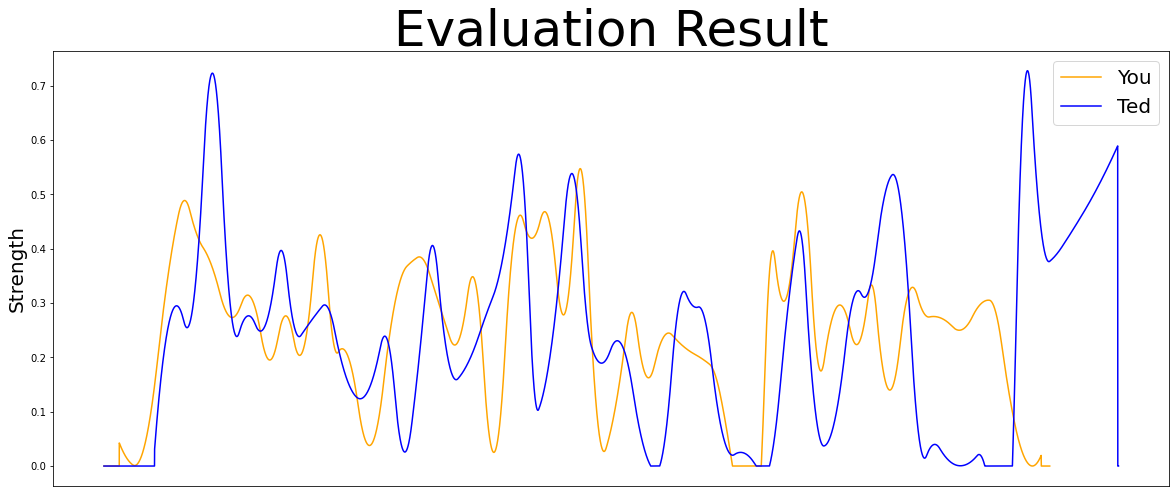

52


In [23]:
path='C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav' # 테드동영상위치
y,sr=librosa.load(path,sr=16000) # y는 amplitude
abs_y=abs(y) # amplitude에 절대값취하기
value=[]  # value 는 구간(width) 에서의 최고값이 들어갈자리
loc=[]   # loc 은 value의 x값 위치
c=0
i=0
width=4000  # width는 그래프에서 중요한부분 뽑을 때 설정하는 구간 넓게 설정하면 정보 많이 날라감
abs_y=list(abs_y) 
while i < len(range(len(y))):
    ten=abs_y[i:i+width]       #ten = 0부터 y길이까지 구간으로 짤른거에서
    a=max(ten)                 #  ten 구간에서 가장큰값이 a로
    b=ten.index(a)             #   b= 그 a값 위치
    value.append(a)            # value리스트에 값저장 
    loc.append(i+b)            # loc에도 위치저장
    if i+width > len(abs_y):   # 구간이 y길이보다 넘어가면 취소
        break
    else:
        c=c+1                  # y길이 안넘어가면 반복
        i=width*c
base=np.empty(len(abs_y))      # base는 빈 array만들어놓고
base.fill(np.nan)
for i in range(len(loc)):       
    location=loc[i]
    base[location]=value[i]     # 빈 어레이에 아까 최대값있었떤 부분 대입 base가 [0,0,0,0,a구간최대값,0,0,0,b구간최대값,] 형태로바뀜
first=np.where(base>st.median(value))[0][0]      #뾰족뾰족 솟은 부분에서 중위수값보다 처음으로 높았던 부분 을 뽑음 
df=pd.DataFrame(base)                               # ( 위에꺼는 두 음악파일의 처음부분 맞쳐주기위해 필요함)
df.interpolate(method='polynomial',order=2,inplace=True) # 이거는 직선 매끄럽게 깍아주려고 2차함수꼴로 바꿔줌
bbb=list(df[0])        
ccc=list(map(lambda x: 0 if x<0 else x,bbb))  # 요거는 2차함수꼴로 깍아주다보면 -값이 발생해서 그걸 0으로바꿔주는과정
df[0]=ccc
st.median(df[0])
df.fillna(0,inplace=True)
#plt.figure(figsize=(20,8))
#plt.plot(df[0],color='blue')

# ###############위에과정반복###########
path2='C:/Users/todtj/OneDrive/바탕 화면/가마우지/TedBear/Anouncement_evaluation/jungeui_voice/12_127_jungeui.wav'# 목소리파일
y1,sr1=librosa.load(path2,sr=16000)
abs_y1=abs(y1)
value1=[]
loc1=[]
c1=0
i=0
abs_y1=list(abs_y1)
while i < len(range(len(y1))):
    ten1=abs_y1[i:i+width]
    a1=max(ten1)
    b1=ten1.index(a1)
    value1.append(a1)
    loc1.append(i+b1)
    if i+width > len(abs_y1):
        break
    else:
        c1=c1+1
        i=width*c1
mult=(st.median(value)/st.median(value1))     ### 이거는 두 그래프의 음량이 다르다보니까 그걸 맞쳐줘야는데 그걸 중위수로 해봤음 
value2=list(map(lambda x: mult*x, value1))    ##            ""
base1=np.empty(len(abs_y1))
base1.fill(np.nan)       
for i in range(len(loc1)):
    location1=loc1[i]
    base1[location1]=value2[i]
first1=np.where(base1>st.median(value1))[0][0]
df1=pd.DataFrame(base1)        
df1.interpolate(method='polynomial',order=2,inplace=True)
bbb=list(df1[0])
ccc=list(map(lambda x: 0 if x<0 else x,bbb))
df1[0]=ccc
df1.fillna(0,inplace=True)

## 이제 다 좌표찍는걸 그리는과정###
if first1>first:                     ## A음성(first1)이 B음성(first)보다 음성이 늦게 시작한다면  그 시작점 맞춰주는과정임
    diff= first1-first               # 두 음성 시작점 차이 구해가지고
    blue=list(df[0])  # blue가 테드
    orange=list(df1[0])# orange가 나
    add=[0 for z in range(diff)]
    blue1=add+blue                 #  더해줘서 blue1생김
    df4=pd.DataFrame(blue1)
    plt.figure(figsize=(20,8))
    # 점수 짧은걸써야함 first1부터 df1[0]       ############# 이거는 점수구하는 과정###########
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first1,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df1[0])]-df4[0][first1:len(df1[0])]))/sum(area))
    else:
        area =[]
        for z in range(first1,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df4[0])]-df4[0][first1:len(df4[0])]))/sum(area))
                                    ##############################
    ysmoothed = gaussian_filter1d(df1[0], sigma=2)      # 이거도 뾰족부분 깍는과정인데 왜 두번들어가더라#
    plt.plot(ysmoothed,color='orange')
    plt.plot(df4[0],color='blue')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
#테듣가 더길떄               ######## 방금 위에한거의 반대과정 A보다 B가 늦게시작할경우######
elif first1<=first:
    diff=first-first1
    blue=list(df[0])
    orange=list(df1[0])
    add=[0 for z in range(diff)]
    orange1=add+blue # 내가짧은이까 더해줘서 orange1이생김
    df4=pd.DataFrame(orange1)
    plt.figure(figsize=(20,8));
    
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum(area))
    else:
        area =[]
        for z in range(first,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df4[0])]-df4[0][first:len(df4[0])]))/sum(area))
    
    if len(df4[0])>len(df1[0]):
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df1[0])]+df1[0][first:len(df1[0])]))
    else:
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df4[0])]+df1[0][first:len(df4[0])]))
    plt.plot(df1[0],color='blue')  
    plt.plot(df4[0],color='orange')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
print(int(points*100))
###############################################

# width는 5000

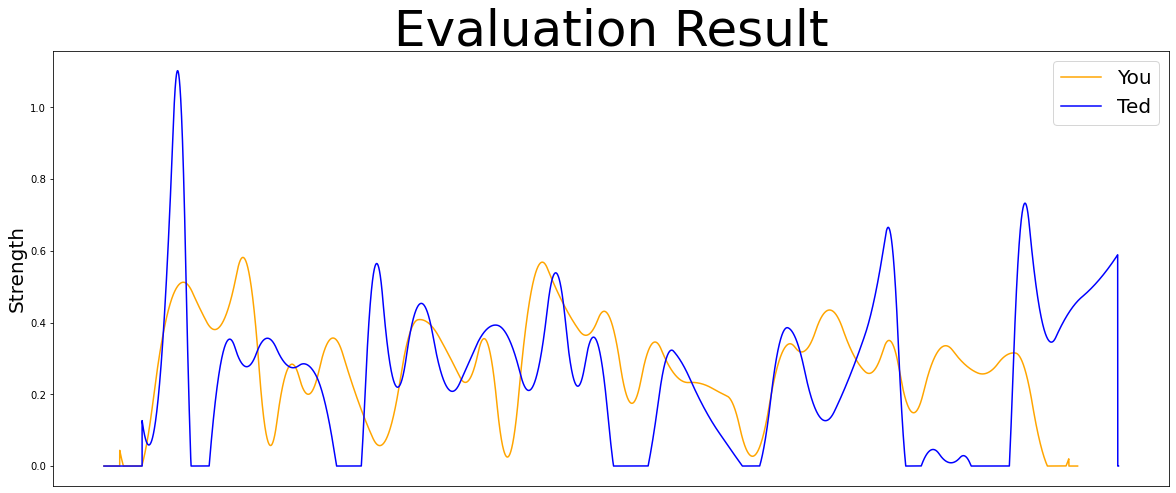

49


In [24]:
path='C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav' # 테드동영상위치
y,sr=librosa.load(path,sr=16000) # y는 amplitude
abs_y=abs(y) # amplitude에 절대값취하기
value=[]  # value 는 구간(width) 에서의 최고값이 들어갈자리
loc=[]   # loc 은 value의 x값 위치
c=0
i=0
width=5000  # width는 그래프에서 중요한부분 뽑을 때 설정하는 구간 넓게 설정하면 정보 많이 날라감
abs_y=list(abs_y) 
while i < len(range(len(y))):
    ten=abs_y[i:i+width]       #ten = 0부터 y길이까지 구간으로 짤른거에서
    a=max(ten)                 #  ten 구간에서 가장큰값이 a로
    b=ten.index(a)             #   b= 그 a값 위치
    value.append(a)            # value리스트에 값저장 
    loc.append(i+b)            # loc에도 위치저장
    if i+width > len(abs_y):   # 구간이 y길이보다 넘어가면 취소
        break
    else:
        c=c+1                  # y길이 안넘어가면 반복
        i=width*c
base=np.empty(len(abs_y))      # base는 빈 array만들어놓고
base.fill(np.nan)
for i in range(len(loc)):       
    location=loc[i]
    base[location]=value[i]     # 빈 어레이에 아까 최대값있었떤 부분 대입 base가 [0,0,0,0,a구간최대값,0,0,0,b구간최대값,] 형태로바뀜
first=np.where(base>st.median(value))[0][0]      #뾰족뾰족 솟은 부분에서 중위수값보다 처음으로 높았던 부분 을 뽑음 
df=pd.DataFrame(base)                               # ( 위에꺼는 두 음악파일의 처음부분 맞쳐주기위해 필요함)
df.interpolate(method='polynomial',order=2,inplace=True) # 이거는 직선 매끄럽게 깍아주려고 2차함수꼴로 바꿔줌
bbb=list(df[0])        
ccc=list(map(lambda x: 0 if x<0 else x,bbb))  # 요거는 2차함수꼴로 깍아주다보면 -값이 발생해서 그걸 0으로바꿔주는과정
df[0]=ccc
st.median(df[0])
df.fillna(0,inplace=True)
#plt.figure(figsize=(20,8))
#plt.plot(df[0],color='blue')

# ###############위에과정반복###########
path2='C:/Users/todtj/OneDrive/바탕 화면/가마우지/TedBear/Anouncement_evaluation/jungeui_voice/12_127_jungeui.wav'# 목소리파일
y1,sr1=librosa.load(path2,sr=16000)
abs_y1=abs(y1)
value1=[]
loc1=[]
c1=0
i=0
abs_y1=list(abs_y1)
while i < len(range(len(y1))):
    ten1=abs_y1[i:i+width]
    a1=max(ten1)
    b1=ten1.index(a1)
    value1.append(a1)
    loc1.append(i+b1)
    if i+width > len(abs_y1):
        break
    else:
        c1=c1+1
        i=width*c1
mult=(st.median(value)/st.median(value1))     ### 이거는 두 그래프의 음량이 다르다보니까 그걸 맞쳐줘야는데 그걸 중위수로 해봤음 
value2=list(map(lambda x: mult*x, value1))    ##            ""
base1=np.empty(len(abs_y1))
base1.fill(np.nan)       
for i in range(len(loc1)):
    location1=loc1[i]
    base1[location1]=value2[i]
first1=np.where(base1>st.median(value1))[0][0]
df1=pd.DataFrame(base1)        
df1.interpolate(method='polynomial',order=2,inplace=True)
bbb=list(df1[0])
ccc=list(map(lambda x: 0 if x<0 else x,bbb))
df1[0]=ccc
df1.fillna(0,inplace=True)

## 이제 다 좌표찍는걸 그리는과정###
if first1>first:                     ## A음성(first1)이 B음성(first)보다 음성이 늦게 시작한다면  그 시작점 맞춰주는과정임
    diff= first1-first               # 두 음성 시작점 차이 구해가지고
    blue=list(df[0])  # blue가 테드
    orange=list(df1[0])# orange가 나
    add=[0 for z in range(diff)]
    blue1=add+blue                 #  더해줘서 blue1생김
    df4=pd.DataFrame(blue1)
    plt.figure(figsize=(20,8))
    # 점수 짧은걸써야함 first1부터 df1[0]       ############# 이거는 점수구하는 과정###########
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first1,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df1[0])]-df4[0][first1:len(df1[0])]))/sum(area))
    else:
        area =[]
        for z in range(first1,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df4[0])]-df4[0][first1:len(df4[0])]))/sum(area))
                                    ##############################
    ysmoothed = gaussian_filter1d(df1[0], sigma=2)      # 이거도 뾰족부분 깍는과정인데 왜 두번들어가더라#
    plt.plot(ysmoothed,color='orange')
    plt.plot(df4[0],color='blue')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
#테듣가 더길떄               ######## 방금 위에한거의 반대과정 A보다 B가 늦게시작할경우######
elif first1<=first:
    diff=first-first1
    blue=list(df[0])
    orange=list(df1[0])
    add=[0 for z in range(diff)]
    orange1=add+blue # 내가짧은이까 더해줘서 orange1이생김
    df4=pd.DataFrame(orange1)
    plt.figure(figsize=(20,8));
    
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum(area))
    else:
        area =[]
        for z in range(first,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df4[0])]-df4[0][first:len(df4[0])]))/sum(area))
    
    if len(df4[0])>len(df1[0]):
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df1[0])]+df1[0][first:len(df1[0])]))
    else:
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df4[0])]+df1[0][first:len(df4[0])]))
    plt.plot(df1[0],color='blue')  
    plt.plot(df4[0],color='orange')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
print(int(points*100))
###############################################

# width=6000

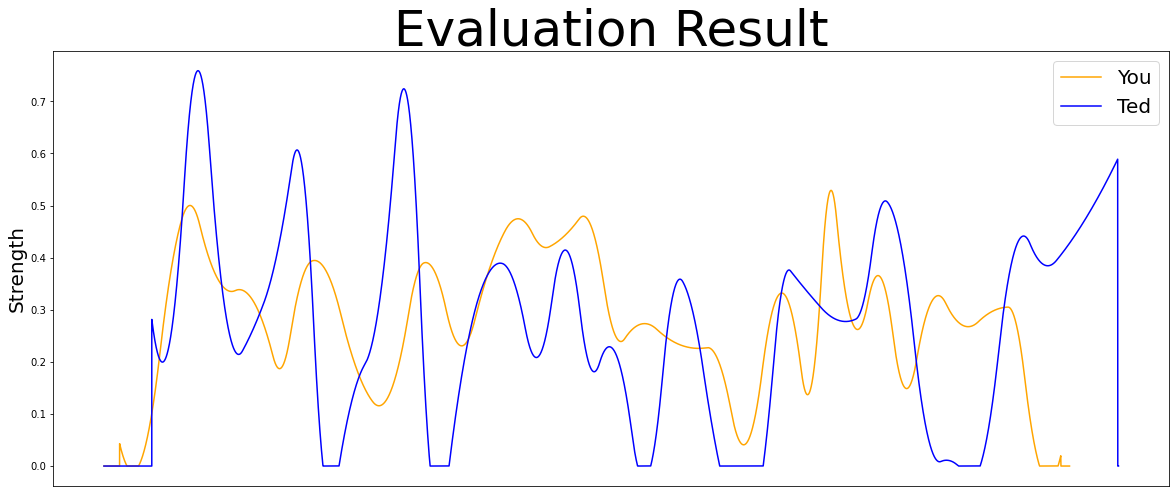

53


In [25]:
path='C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav' # 테드동영상위치
y,sr=librosa.load(path,sr=16000) # y는 amplitude
abs_y=abs(y) # amplitude에 절대값취하기
value=[]  # value 는 구간(width) 에서의 최고값이 들어갈자리
loc=[]   # loc 은 value의 x값 위치
c=0
i=0
width=6000  # width는 그래프에서 중요한부분 뽑을 때 설정하는 구간 넓게 설정하면 정보 많이 날라감
abs_y=list(abs_y) 
while i < len(range(len(y))):
    ten=abs_y[i:i+width]       #ten = 0부터 y길이까지 구간으로 짤른거에서
    a=max(ten)                 #  ten 구간에서 가장큰값이 a로
    b=ten.index(a)             #   b= 그 a값 위치
    value.append(a)            # value리스트에 값저장 
    loc.append(i+b)            # loc에도 위치저장
    if i+width > len(abs_y):   # 구간이 y길이보다 넘어가면 취소
        break
    else:
        c=c+1                  # y길이 안넘어가면 반복
        i=width*c
base=np.empty(len(abs_y))      # base는 빈 array만들어놓고
base.fill(np.nan)
for i in range(len(loc)):       
    location=loc[i]
    base[location]=value[i]     # 빈 어레이에 아까 최대값있었떤 부분 대입 base가 [0,0,0,0,a구간최대값,0,0,0,b구간최대값,] 형태로바뀜
first=np.where(base>st.median(value))[0][0]      #뾰족뾰족 솟은 부분에서 중위수값보다 처음으로 높았던 부분 을 뽑음 
df=pd.DataFrame(base)                               # ( 위에꺼는 두 음악파일의 처음부분 맞쳐주기위해 필요함)
df.interpolate(method='polynomial',order=2,inplace=True) # 이거는 직선 매끄럽게 깍아주려고 2차함수꼴로 바꿔줌
bbb=list(df[0])        
ccc=list(map(lambda x: 0 if x<0 else x,bbb))  # 요거는 2차함수꼴로 깍아주다보면 -값이 발생해서 그걸 0으로바꿔주는과정
df[0]=ccc
st.median(df[0])
df.fillna(0,inplace=True)
#plt.figure(figsize=(20,8))
#plt.plot(df[0],color='blue')

# ###############위에과정반복###########
path2='C:/Users/todtj/OneDrive/바탕 화면/가마우지/TedBear/Anouncement_evaluation/jungeui_voice/12_127_jungeui.wav'# 목소리파일
y1,sr1=librosa.load(path2,sr=16000)
abs_y1=abs(y1)
value1=[]
loc1=[]
c1=0
i=0
abs_y1=list(abs_y1)
while i < len(range(len(y1))):
    ten1=abs_y1[i:i+width]
    a1=max(ten1)
    b1=ten1.index(a1)
    value1.append(a1)
    loc1.append(i+b1)
    if i+width > len(abs_y1):
        break
    else:
        c1=c1+1
        i=width*c1
mult=(st.median(value)/st.median(value1))     ### 이거는 두 그래프의 음량이 다르다보니까 그걸 맞쳐줘야는데 그걸 중위수로 해봤음 
value2=list(map(lambda x: mult*x, value1))    ##            ""
base1=np.empty(len(abs_y1))
base1.fill(np.nan)       
for i in range(len(loc1)):
    location1=loc1[i]
    base1[location1]=value2[i]
first1=np.where(base1>st.median(value1))[0][0]
df1=pd.DataFrame(base1)        
df1.interpolate(method='polynomial',order=2,inplace=True)
bbb=list(df1[0])
ccc=list(map(lambda x: 0 if x<0 else x,bbb))
df1[0]=ccc
df1.fillna(0,inplace=True)

## 이제 다 좌표찍는걸 그리는과정###
if first1>first:                     ## A음성(first1)이 B음성(first)보다 음성이 늦게 시작한다면  그 시작점 맞춰주는과정임
    diff= first1-first               # 두 음성 시작점 차이 구해가지고
    blue=list(df[0])  # blue가 테드
    orange=list(df1[0])# orange가 나
    add=[0 for z in range(diff)]
    blue1=add+blue                 #  더해줘서 blue1생김
    df4=pd.DataFrame(blue1)
    plt.figure(figsize=(20,8))
    # 점수 짧은걸써야함 first1부터 df1[0]       ############# 이거는 점수구하는 과정###########
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first1,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df1[0])]-df4[0][first1:len(df1[0])]))/sum(area))
    else:
        area =[]
        for z in range(first1,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first1:len(df4[0])]-df4[0][first1:len(df4[0])]))/sum(area))
                                    ##############################
    ysmoothed = gaussian_filter1d(df1[0], sigma=2)      # 이거도 뾰족부분 깍는과정인데 왜 두번들어가더라#
    plt.plot(ysmoothed,color='orange')
    plt.plot(df4[0],color='blue')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
#테듣가 더길떄               ######## 방금 위에한거의 반대과정 A보다 B가 늦게시작할경우######
elif first1<=first:
    diff=first-first1
    blue=list(df[0])
    orange=list(df1[0])
    add=[0 for z in range(diff)]
    orange1=add+blue # 내가짧은이까 더해줘서 orange1이생김
    df4=pd.DataFrame(orange1)
    plt.figure(figsize=(20,8));
    
    if len(df4[0])>len(df1[0]):
        area =[]
        for z in range(first,len(df1[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum(area))
    else:
        area =[]
        for z in range(first,len(df4[0]),1):
            if df1[0][z]>df4[0][z]:
                area.append(df1[0][z])
            else:
                area.append(df4[0][z])        
        points=1-(sum(abs(df1[0][first:len(df4[0])]-df4[0][first:len(df4[0])]))/sum(area))
    
    if len(df4[0])>len(df1[0]):
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df1[0])]+df1[0][first:len(df1[0])]))
    else:
        points=sum(abs(df1[0][first:len(df1[0])]-df4[0][first:len(df1[0])]))/sum((df4[0][first:len(df4[0])]+df1[0][first:len(df4[0])]))
    plt.plot(df1[0],color='blue')  
    plt.plot(df4[0],color='orange')
    plt.title('Evaluation Result',fontsize=50)
    plt.legend(['You','Ted'],fontsize=20)
    plt.ylabel('Strength',fontsize=20)
    plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
    plt.show()
print(int(points*100))
###############################################

# pitch 했던거  F0 pitch 이런식으로 검색하면 나옴 사실이게 기본음잡는거여서 이론적으로 음평가하는데 좋은 접근은아닌듯

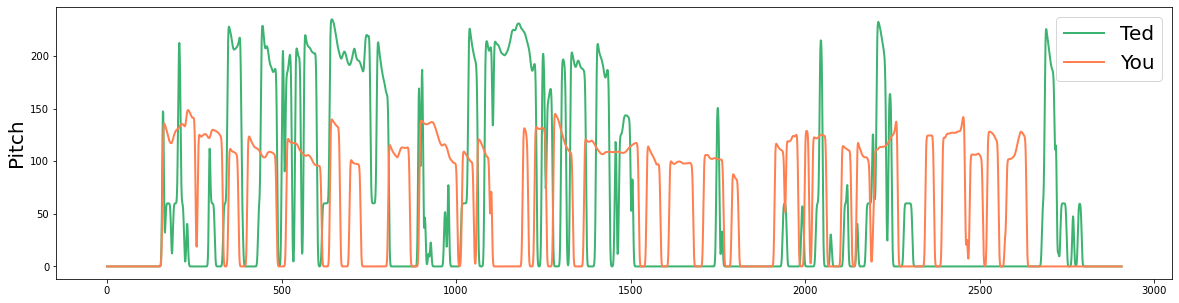

In [26]:
#rcParams['figure.figsize'] = (20, 8)
sr, x = wavfile.read('C:/Users/todtj/OneDrive/바탕 화면/가마우지/TedBear/Anouncement_evaluation/jungeui_voice/12_127_jungeui.wav')
assert sr == 16000
x = x.astype(np.float64)
frame_length = 1024
hop_length = 80
f0 = pysptk.swipe(x.astype(np.float64), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)

sr1, x1 = wavfile.read('C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav')
assert sr1 == 16000
x1 = x1.astype(np.float64)
frame_length = 1024
hop_length = 80

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x1, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)

assert frames.shape[1] == frame_length
# F0 estimation
f0_ted= pysptk.swipe(x1.astype(np.float64), fs=sr1, hopsize=hop_length, min=60, max=240, otype="f0")

plt.figure(figsize=(20,5))
##############
assert frames.shape[1] == frame_length
if np.where(f0>=60)[0][0] > np.where(f0_ted>=60)[0][0]: #테드가 왼쪽에서 시작
    diff_f0=np.where(f0>=60)[0][0]-np.where(f0_ted>=60)[0][0]
    zero_f0=np.zeros(diff_f0)
    new_f0=np.r_[zero_f0,f0_ted]
    new_f0=gaussian_filter1d(new_f0, sigma=2)
    you0=np.r_[f0,np.zeros(len(new_f0)-len(f0))]
    you0=gaussian_filter1d(you0, sigma=2)
    #you0=you0*(max(new_f0)/max(you0))
    plt.plot(new_f0,color='mediumseagreen',linewidth=2)
    plt.plot(you0,color='coral',linewidth=2)
    plt.ylabel('Pitch',fontsize=20)
    plt.legend(['Ted','You'],fontsize=20)
else:
    diff_f0_ted=np.where(f0_ted>=60)[0][0]-np.where(f0>=60)[0][0]
    zero_f0_ted=np.zeros(diff_f0_ted)
    new_f0_ted=np.r_[zero_f0_ted,f0]
    new_f0_ted=gaussian_filter1d(new_f0_ted, sigma=2)
    you1=np.r_[f0_ted,np.zeros(len(new_f0_ted)-len(f0_ted))]
    you1=gaussian_filter1d(you1, sigma=2)
    plt.plot(new_f0_ted,color='mediumseagreen',linewidth=2)
    plt.plot(you1,color='coral',linewidth=2)
    plt.ylabel('Pitch',fontsize=20)
    plt.legend(['You','Ted'],fontsize=20)

# 그외 해봤던것들 음평가위해

y혹은 y1에 들어가는것들은 librosa.load 거기서 나오는 y임

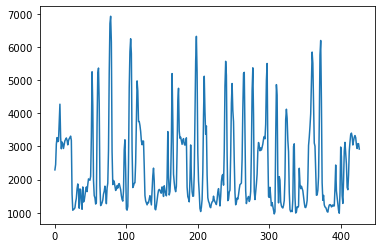

In [28]:
# 스펙트럴 센트로이드 y값에 들어가는건 libros
plt.plot(librosa.feature.spectral_centroid(y1)[0]) # 나 주황색

# roll off  이거는 센트로이드랑 거의 비슷하다고보면됨  이론상

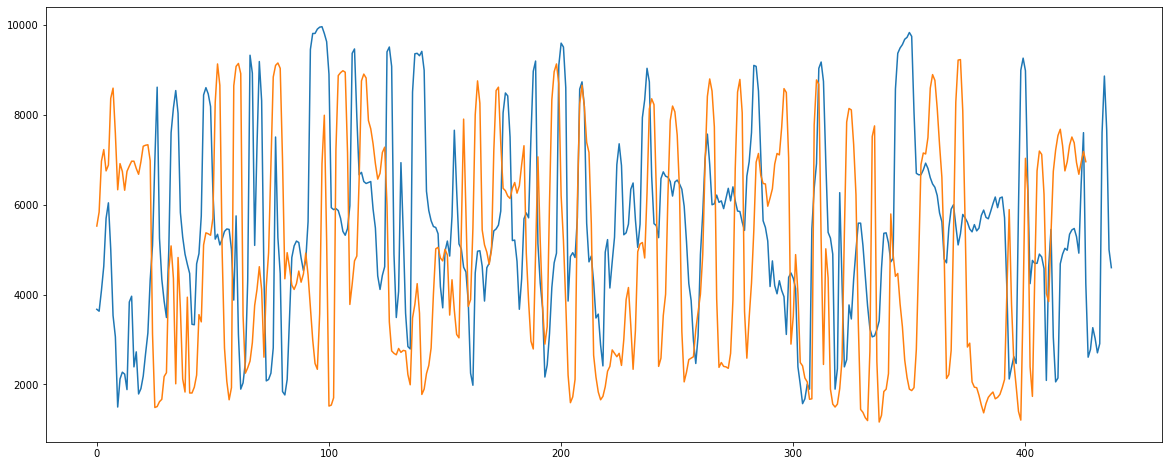

In [34]:
plt.figure(figsize=(20,8))
plt.plot(librosa.feature.spectral_rolloff(y)[0]) # ted
plt.plot(librosa.feature.spectral_rolloff(y1)[0]) # 나 주황색

# flatness 예를들어 모든주파수에 힘이 고르게 있다면 (백색소음같이) 값이 1이나와야됨 이론상 한쪽으로 주파수가 쏠렷다면 0

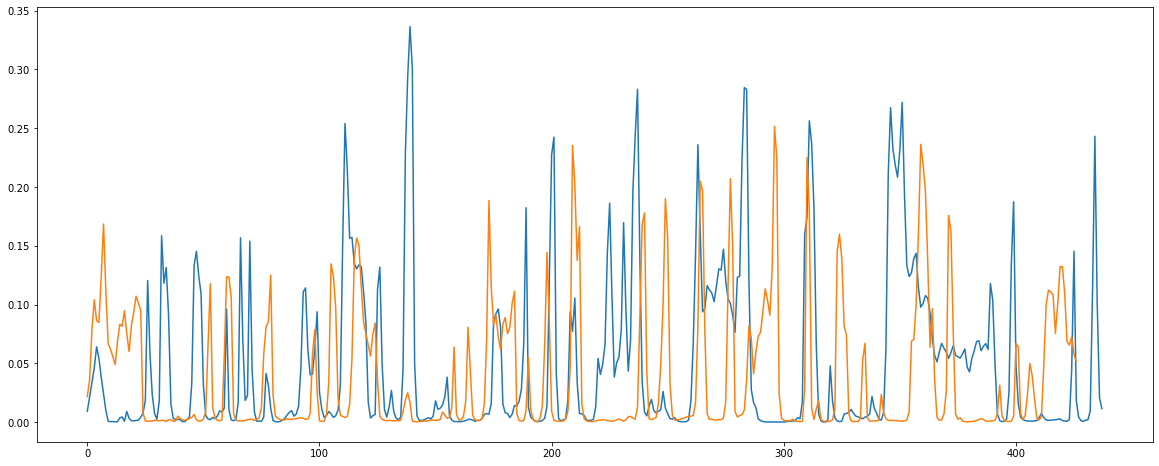

In [35]:
plt.figure(figsize=(20,8))
plt.plot(librosa.feature.spectral_flatness(y)[0]) # ted
plt.plot(librosa.feature.spectral_flatness(y1)[0])

# 크로마 cqt? 그냥 그려봄

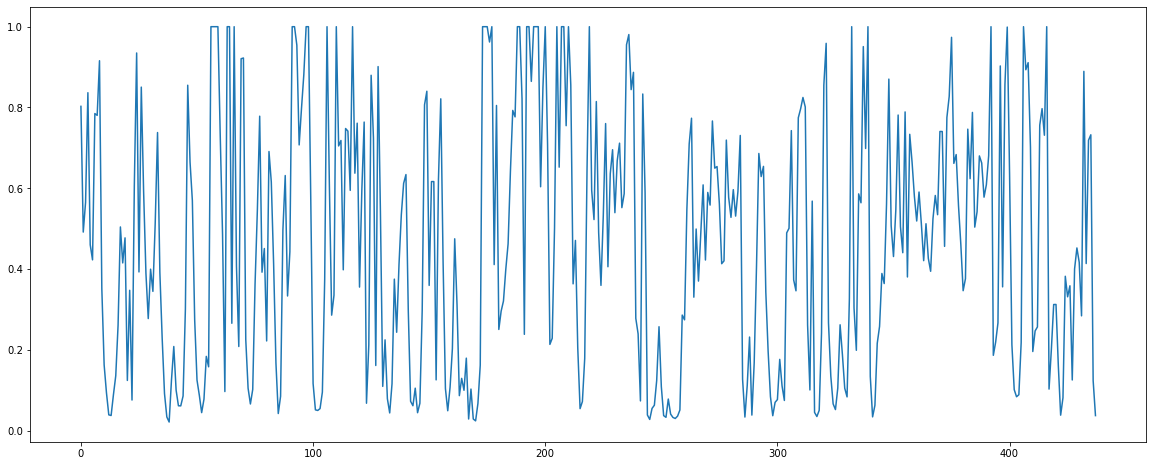

In [36]:
plt.figure(figsize=(20,8))
plt.plot(librosa.feature.chroma_cqt(y)[0]) # ted


# 이것도 걍 그려봄 먼지잘모름 ..

In [39]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

In [41]:
import librosa.display

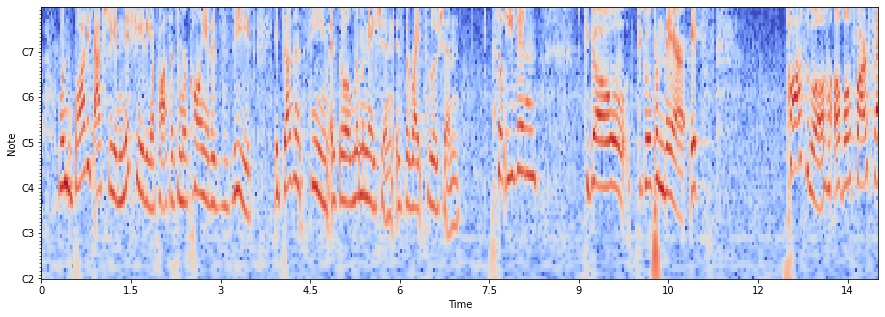

In [42]:
logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

# 크로마 핏치별로 힘?표시 직접들어보면 빨간부분이 소리가 꺼지는부분같음

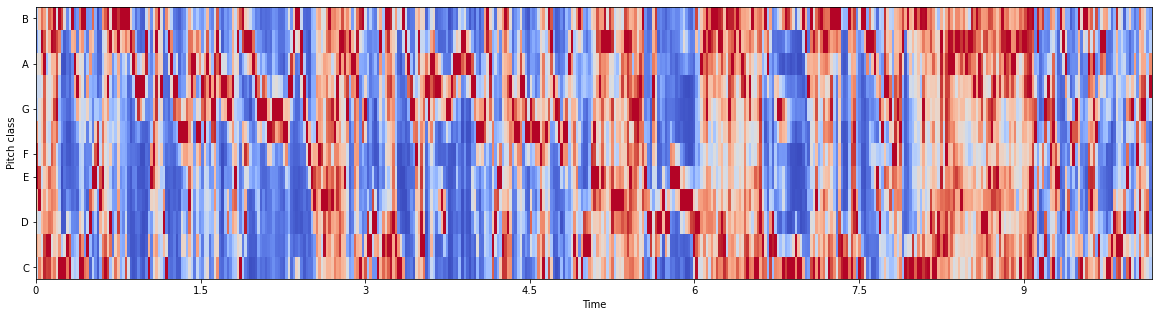

In [44]:
chromagram = librosa.feature.chroma_cqt(y, sr=16000, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [2]:
path='C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav'

In [4]:
y, sr = librosa.load('C:/Users/todtj/OneDrive/바탕 화면/script_sentence/12_127.wav', sr=16000)

In [8]:
S = librosa.feature.melspectrogram(y=y, sr=16000, n_mels=128,fmax=8000)

In [10]:
import librosa.display

In [ ]:
ipython

In [13]:
IPython.display.Audio(data=y,rate=16000)

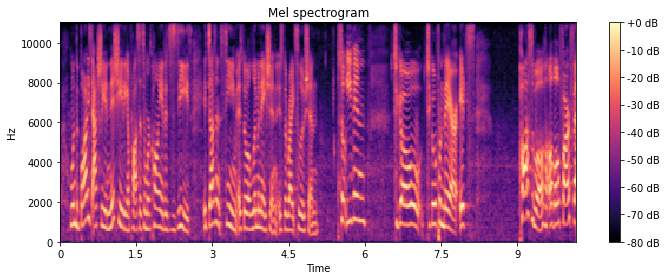

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

Text(0.5, 1.0, 'Log-frequency power spectrogram')

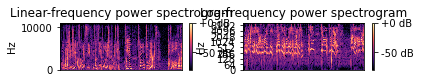

In [25]:
 D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

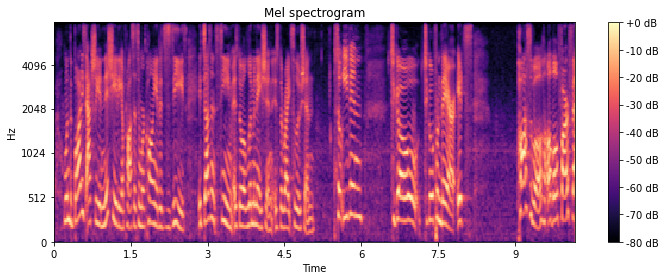

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [20]:
len(librosa.power_to_db(S,ref=np.max))

128